In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_excel('/content/sample_data/data.xlsx')
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


# Просмотр данных

Видим какой-то странный пустой столбец, удалим его

In [3]:
df=df.drop(columns='Unnamed: 5', axis=1)
df

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   document        709 non-null    object 
 6   receiving_date  607 non-null    object 
dtypes: float64(2), object(5)
memory usage: 40.0+ KB


Видим что есть пропуски данных

In [47]:
df.loc[:, 'receiving_date'] = pd.to_datetime(df['receiving_date'], errors="coerce")#.dt.date

<ipython-input-47-3b49f2fe4c6f>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'receiving_date'] = pd.to_datetime(df['receiving_date'], errors="coerce")#.dt.date


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,724.0,183.084254,106.590761,6.0,86.0000,194.00,273.00,398.0
sum,724.0,7162.542030,6308.571297,23.7,3114.7325,5207.99,8934.95,39713.5


In [34]:
df.describe(include=[object]).T

,count,unique,top,freq
status,730,11,ОПЛАЧЕНО,622
sale,724,12,Петрова,169
new/current,724,3,текущая,620
document,709,3,оригинал,595
deadline_month,730,7,10,135


In [35]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['status', 'sale', 'new/current', 'document', 'deadline_month'], dtype='object')

Индексы с пустым id

In [28]:
mask=list(df[df['client_id'].isnull()].index)
mask

[0, 129, 258, 369, 484, 594]

In [41]:
df['deadline_month']=0
count=4
for i in range(len(df)):
  df['deadline_month'][i]=count
  if i in mask:
    count+=1

<ipython-input-41-b7c03fe4a512>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deadline_month'][i]=count


In [48]:
df['month'] = df['receiving_date'].dt.month
df

,client_id,sum,status,sale,new/current,document,receiving_date,deadline_month,month
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaT,4,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,5,NaN
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5,7.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6.0
...,...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10,11.0
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,10,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,10,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,10,11.0


In [79]:
df=df.dropna(subset=['receiving_date'])

# Вопросы

Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.


In [14]:
print(df['status'].unique())

['ВНУТРЕННИЙ' 'ОПЛАЧЕНО' 'ПРОСРОЧЕНО' 'В РАБОТЕ']


In [51]:
print(df['receiving_date'].dt.year.unique())

[2021]


Везде год 2021

In [80]:
print(f"выручка составила  {df.loc[(df['status']!= 'ПРОСРОЧЕНО') & (df['month']==7.0)]['sum'].sum():.3f}")

выручка составила  757830.740


Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [81]:
df_plot=df[['sum', 'receiving_date']].groupby('receiving_date').sum()
df_plot

,sum
receiving_date,
2021-05-18,40471.6
2021-05-31,3453.7
2021-06-01,10133.7
2021-06-02,5048.7
2021-06-03,31448.1
...,...
2021-11-09,52644.8
2021-11-10,24646.3
2021-11-11,80179.7


Text(0, 0.5, 'Sales')

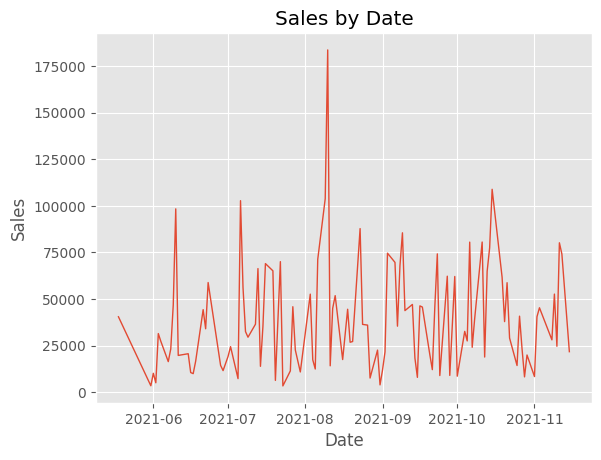

In [74]:
plt.plot (df_plot, linewidth=1)

plt.title('Sales by Date')
plt.xlabel('Date')
plt.ylabel('Sales')

Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [82]:
df[df['month']==9].groupby('sale').sum().sort_values('sum', ascending=False)

<ipython-input-82-3eeaa5e55e3f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['month']==9].groupby('sale').sum().sort_values('sum', ascending=False)


,client_id,sum,deadline_month,month
sale,,,,
Петрова,4661.0,219240.12,229,288.0
Иванов,1623.0,165314.80,104,126.0
Смирнов,3456.0,155245.90,142,162.0
Андреев,3169.0,124714.55,127,144.0
Кузнецова,958.0,60230.20,60,72.0
Васильев,3137.0,55667.50,99,126.0
Филимонова,1296.0,45763.30,66,81.0
Соколов,1787.0,44234.60,62,72.0


Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?



In [83]:
df.loc[df['month']==10.0]['new/current'].value_counts()

текущая    105
новая       17
Name: new/current, dtype: int64

Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [84]:
print("Количество оригиналов ", len(df.loc[(df['document']=='оригинал') & (df['month']==6.0)]))

Количество оригиналов  76


## Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.

За **новые** сделки менеджер получает **7 % от суммы**, при условии, что статус **оплаты «ОПЛАЧЕНО»**, а также имеется **оригинал** подписанного договора с клиентом (в рассматриваемом месяце).

За **текущие** сделки менеджер получает *5 % от суммы*, если она больше *10 тыс*., и **3 % **от суммы, **если меньше**. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие** оригинала** подписанного договора с клиентом (в рассматриваемом месяце).


Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по мере прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.


In [89]:
df

,client_id,sum,status,sale,new/current,document,receiving_date,deadline_month,month,bonus
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5,7.0,0.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6.0,0.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6.0,0.0
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5,7.0,0.0
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,5,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...
718,304.0,2803.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-11-09,10,11.0,0.0
724,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10,11.0,0.0
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10,11.0,0.0
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,10,11.0,0.0


In [90]:
df['bonus']=0
df

<ipython-input-90-d0de1768a6f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bonus']=0


,client_id,sum,status,sale,new/current,document,receiving_date,deadline_month,month,bonus
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5,7.0,0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6.0,0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6.0,0
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5,7.0,0
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,5,7.0,0
...,...,...,...,...,...,...,...,...,...,...
718,304.0,2803.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-11-09,10,11.0,0
724,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10,11.0,0
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10,11.0,0
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,10,11.0,0


In [96]:
df.loc[((df['status'] == 'ОПЛАЧЕНО') &
   (df['new/current'] == 'новая') &
   (df['document']=='оригинал')), 'bonus'] = 0.07

df.loc[((df['status'] != 'ПРОСРОЧЕНО') &
   (df['new/current'] == 'текущая') &
   (df['document']=='оригинал')&
   (df['sum'] >= 10000)),'bonus'] = 0.05

df.loc[((df['status'] != 'ПРОСРОЧЕНО') &
    (df['new/current'] == 'текущая') &
    (df['document']=='оригинал')&
    (df['sum'] < 10000)),'bonus'] = 0.03


In [97]:
df['prize']=df['bonus']*df['sum']
df

<ipython-input-97-764e935663a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prize']=df['bonus']*df['sum']


,client_id,sum,status,sale,new/current,document,receiving_date,deadline_month,month,bonus,prize
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5,7.0,0.07,381.689
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6.0,0.05,699.585
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6.0,0.03,21.591
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5,7.0,0.03,127.611
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,5,7.0,0.03,173.901
...,...,...,...,...,...,...,...,...,...,...,...
718,304.0,2803.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-11-09,10,11.0,0.03,84.111
724,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10,11.0,0.03,103.611
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10,11.0,0.03,129.861
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,10,11.0,0.07,308.259


Нам нужны те месяца, в которых дата поступления оригинала больше 10 (>10)

In [ ]:
balance_res = df[((df['transaction_date'] == '05') | (df['transaction_date'] == '06')) &
    (df['receiving_date'] >= pd.to_datetime('2021-07-01'))][['sale', 'balance']].groupby('sale').sum()